In [9]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
#中文标注正常显示
plt.rcParams['font.sans-serif']=['SimHei']

# 数据加载

In [12]:
data = pd.read_csv('shanghai_1990_12_19_to_2020_11_30.csv',encoding = 'gb2312')
time_price = ['日期','收盘价']
time_price_data = data[time_price][::-1]
time_price_data

,日期,收盘价
7319,1990-12-19,99.9800
7318,1990-12-20,104.3900
7317,1990-12-21,109.1300
7316,1990-12-24,114.5500
7315,1990-12-25,120.2500
...,...,...
4,2020-11-24,3402.8225
3,2020-11-25,3362.3274
2,2020-11-26,3369.7334
1,2020-11-27,3408.3071


# 画图做初步分析

<Figure size 432x288 with 0 Axes>

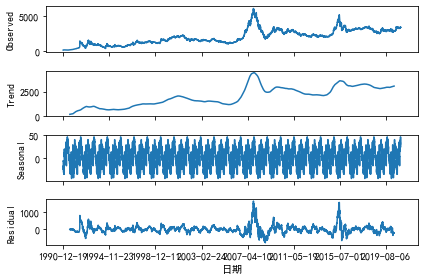

In [13]:
time_price_data = time_price_data.set_index('日期')
#对趋势、季节性、残差进行画图分析，默认加法模型
res = sm.tsa.seasonal_decompose(time_price_data['收盘价'],freq = 289)
res.plot()
plt.show()

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


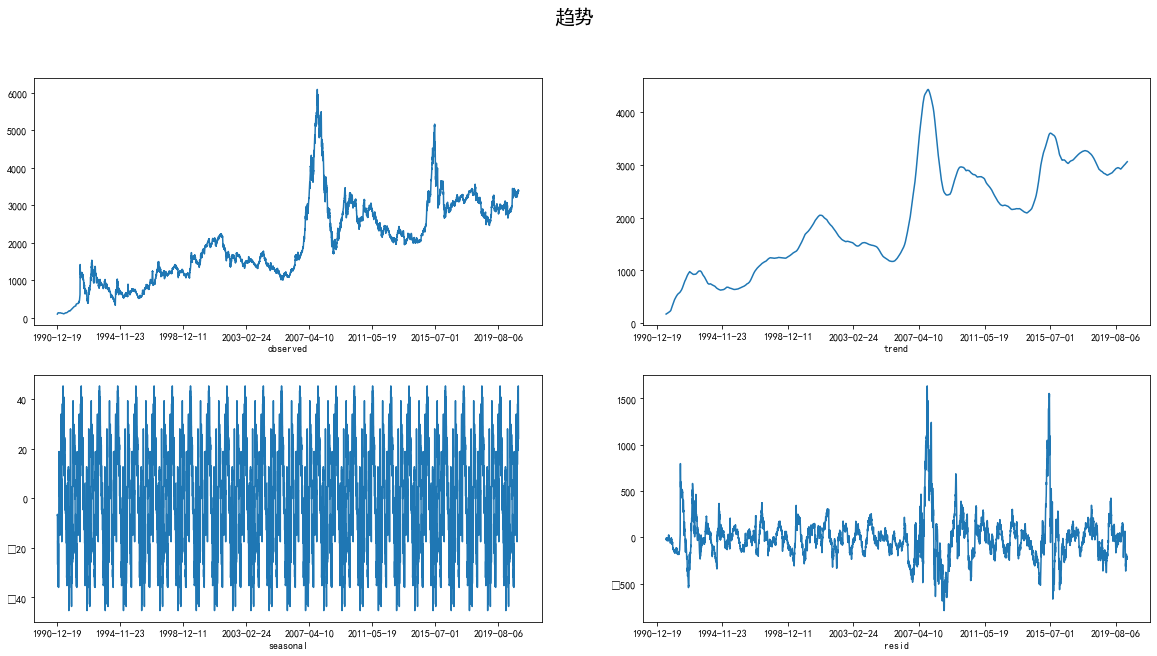

In [17]:
#observed, seasonal, trend, resid 四部分可分别画出来
plt.figure(figsize = (20,10))
plt.suptitle('趋势',fontsize = 20)
plt.subplot(221)
res.observed.plot(label = 'observed')
plt.xlabel('observed')
plt.subplot(222)
res.trend.plot(label ='trend' )
plt.xlabel('trend')
plt.subplot(223)
res.seasonal.plot(label = 'seasonal')
plt.xlabel('seasonal')
plt.subplot(224)
res.resid.plot(label = 'resid')
plt.xlabel('resid')
plt.show()

In [18]:
#数据探索，按照天、月、季度、年来显示沪市指数的走势
time_price_data = data[time_price][::-1]
time_price_data['日期'] = pd.to_datetime(time_price_data['日期'])
time_price_data.set_index('日期',inplace = True)
print(time_price_data)

                  收盘价
日期                   
1990-12-19    99.9800
1990-12-20   104.3900
1990-12-21   109.1300
1990-12-24   114.5500
1990-12-25   120.2500
...               ...
2020-11-24  3402.8225
2020-11-25  3362.3274
2020-11-26  3369.7334
2020-11-27  3408.3071
2020-11-30  3391.7551

[7320 rows x 1 columns]


In [19]:
#按照月，季度，年来统计
data_month = time_price_data.resample('M').mean()
data_Q = time_price_data.resample('Q-DEC').mean()
data_year = time_price_data.resample('A-DEC').mean()

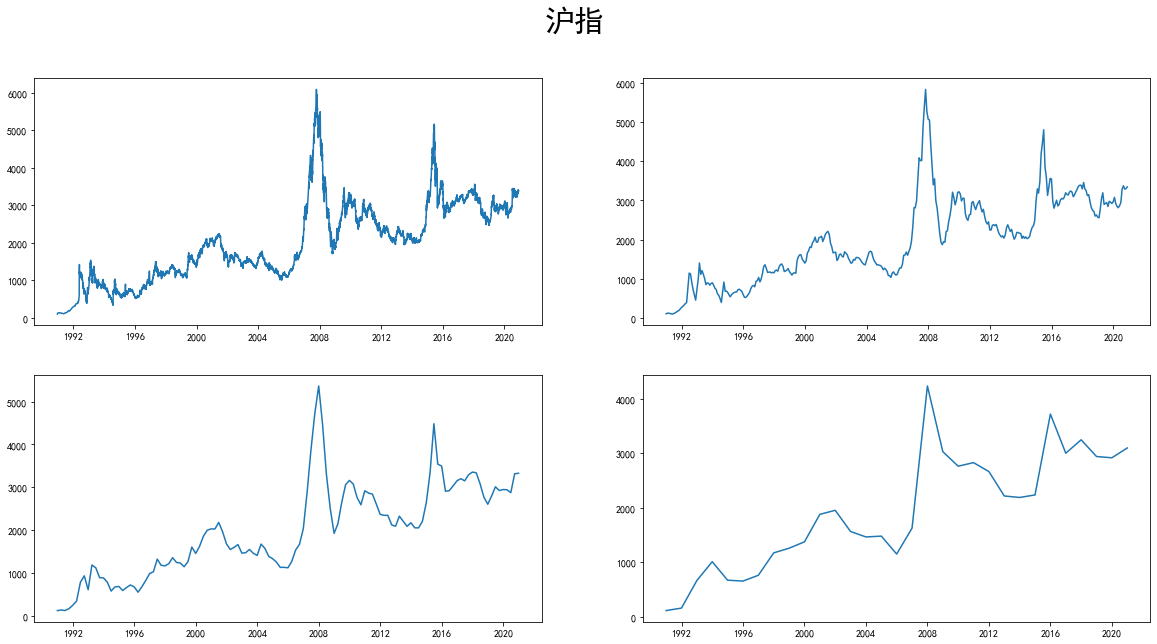

In [20]:
#按照月，季度，年来画图
fig = plt.figure(figsize = [20,10])
plt.suptitle('沪指',fontsize = 30)
plt.subplot(221)
plt.plot(time_price_data['收盘价'],label = '按天')
plt.subplot(222)
plt.plot(data_month['收盘价'],label = '按月')
plt.subplot(223)
plt.plot(data_Q['收盘价'],label = '按季度')
plt.subplot(224)
plt.plot(data_year['收盘价'],label = '按年')
plt.show()

# ARMA

In [21]:
#设置参数范围
from itertools import product
ps = [i for i in range(5)]
qs = [i for i in range(5)]
parameters = list(product(ps,qs))

In [23]:
from statsmodels.tsa.arima_model import ARMA, ARIMA 
#暴露寻最优arma，aic最小
best_aic = float('inf')
for parameter in parameters:
    try:
        model = ARMA(time_price_data['收盘价'],order = (parameter[0],parameter[1])).fit()
    except ValueError:
        print('参数错误',parameter)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model  =model
        best_aic = aic
        best_parameter = parameter
print(best_parameter,best_aic)

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

参数错误 (0, 2)
参数错误 (0, 3)
参数错误 (0, 4)


F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored whe

(4, 4) 75060.11971784133


In [24]:
time_price_data.reset_index(inplace = True)

In [25]:
#增加需要预测的时间点
from datetime import datetime
day_list = [datetime(2020,12,i+1) for i in range(31)]
data_days = pd.DataFrame(day_list,columns =['日期'] )
data_days2 = pd.concat([time_price_data,data_days])
data_days2

,日期,收盘价
0,1990-12-19,99.98
1,1990-12-20,104.39
2,1990-12-21,109.13
3,1990-12-24,114.55
4,1990-12-25,120.25
...,...,...
26,2020-12-27,NaN
27,2020-12-28,NaN
28,2020-12-29,NaN
29,2020-12-30,NaN


In [27]:
import numpy as np
data_days2['predict'] = best_model.predict(start = 0,end =data_days2.shape[0] )
data_days2.loc[0,'predict']=np.NaN
data_days2.set_index('日期',inplace = True)
data_days2

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,收盘价,predict
日期,,
1990-12-19,99.98,NaN
1990-12-20,104.39,101.423147
1990-12-21,109.13,106.049104
1990-12-24,114.55,110.598990
1990-12-25,120.25,116.247400
...,...,...
2020-12-27,NaN,134.506388
2020-12-28,NaN,133.900423
2020-12-29,NaN,133.331558


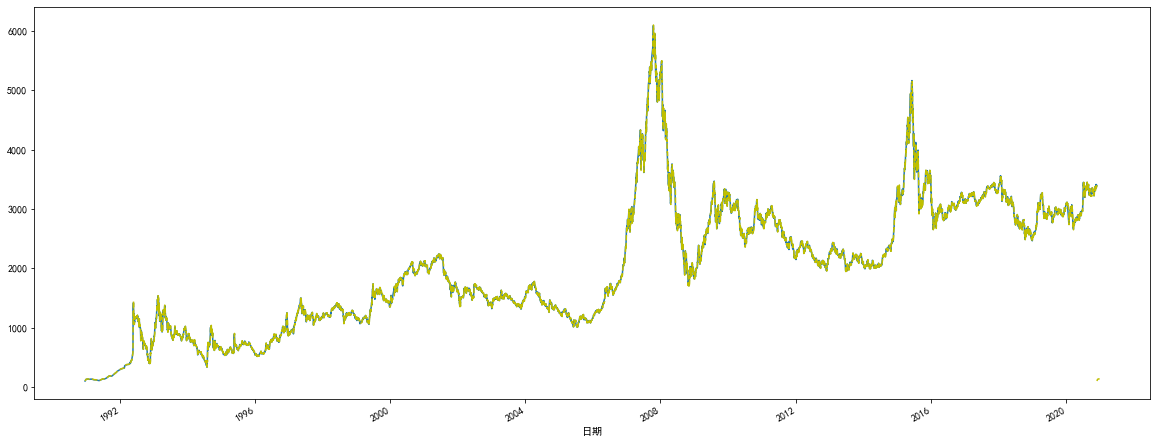

In [28]:
#画图显示
plt.figure(figsize= (20,8))
data_days2['收盘价'].plot(label = '实际指数')
data_days2['predict'].plot(label = '预测指数',ls = '--',color = 'y')
plt.show()

# ARIMA

*  设置参数范围